In [1]:
%matplotlib inline


In [41]:
import numpy as np
from scipy.integrate import odeint
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [45]:
# Initialize Parts
# Initialize Simulation
# Initial concentration of mRNA and Protein for each repressor
mtet, mlac, mgamma, tet, lac, gamma = initial = [1, 1, 1, 2, 1, 1]
# Non-dimensionalized production rate
alpha = 15
# Degradation Rate
beta = 2000
# Repressor/Promoter Leak
leak = 1
# Hill Coefficient
n = 8
# tetr  is orange [1.00, 0.75, 0.17]
# lacI  is green  [0.38, 0.82, 0.32]
# gamma is blue   [0.38, 0.65, 0.87]
plac = {'name':'P_lac', 'start':1, 'end':10, 'type':'Promoter', 'opts': {'color':[0.38, 0.82, 0.32]}}
rbs1 = {'name':'RBS', 'start':11, 'end':20, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
tetr = {'name':'tetR', 'start':21, 'end':40, 'type':'CDS', 'opts':{'label': 'tetR', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':[1.00, 0.75, 0.17]}}
term1 = {'name':'Term', 'start':41, 'end':55, 'type':'Terminator'}
pgamma = {'name':'P_gamma', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.38, 0.65, 0.87]}}
rbs2 = {'name':'RBS', 'start':66, 'end':75, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
laci = {'name':'lacI', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'lacI', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':[0.38, 0.82, 0.32]}}
term2 = {'name':'Term', 'start':96, 'end':110, 'type':'Terminator'}
ptet = {'name':'P_tet', 'start':111, 'end':120, 'type':'Promoter', 'opts': {'color':[1.00, 0.75, 0.17]}}
rbs3 = {'name':'RBS', 'start':121, 'end':130, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
gammaimg = {'name':'gamma', 'start':131, 'end':150, 'type':'CDS', 'opts':{'label': 'gamma', 'fontsize': 8, 'label_y_offset': 0, 'label_x_offset': -1, 'label_style':'italic', 'color':[0.38, 0.65, 0.87]}}
term3 = {'name':'Term', 'start':151, 'end':165, 'type':'Terminator'}

lac_repress = {'from_part':laci, 'to_part':plac, 'type':'Repression', 'opts':{'linewidth':1, 'color':[0.38, 0.82, 0.32]}}
gamma_repress = {'from_part':gammaimg, 'to_part':pgamma, 'type':'Repression', 'opts':{'linewidth':1, 'color':[0.38, 0.65, 0.87]}}
tet_repress = {'from_part':tetr, 'to_part':ptet, 'type':'Repression', 'opts':{'linewidth':1, 'color':[1.00, 0.75, 0.17]}}

def repressilator(y, t):
    mtet, mlac, mgamma, tet, lac, gamma = y
    
    dmtet = -mtet + (alpha / (1 + lac**n)) + leak
    dtet = -beta * (tet - mtet)
    
    dmlac = -mlac + (alpha / (1 + gamma**n)) + leak
    dlac = -beta * (lac - mlac)
    
    dmgamma = -mgamma + (alpha / (1 + tet**n)) + leak
    dgamma = -beta * (gamma - mgamma)
    return [dmtet, dmlac, dmgamma, dtet, dlac, dgamma]

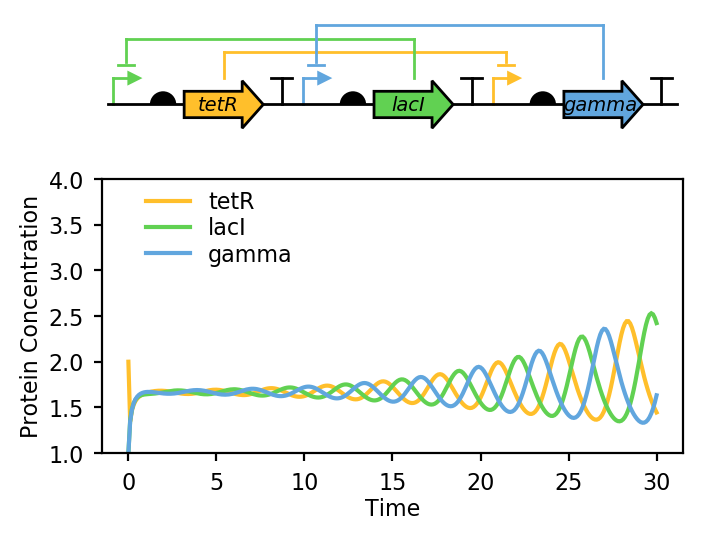

In [61]:
# Initial concentration of mRNA and Protein for each repressor
mtet, mlac, mgamma, tet, lac, gamma = initial = [1, 1, 1, 2, 1, 1]
# Non-dimensionalized production rate
alpha = 15
# Degradation Rate
beta = 2000
# Repressor/Promoter Leak
leak = 1
# Hill Coefficient
n = 6

mtet, mlac, mgamma, tet, lac, gamma = initial = [1, 1, 1, 2, 1, 1]

t = np.arange(0, 30.1, 0.1)
ymtet, ymlac, ymgamma, ytet, ylac, ygamma = list(zip(*odeint(repressilator, initial, t)))

plt.figure(figsize=(3.5, 6.5),dpi=200)
gs = gridspec.GridSpec(8, 1, height_ratios=[1, 2.5, 0.1, 1, 1, 1, 1, 1])
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gammaimg, term3]],[[lac_repress, gamma_repress, tet_repress]])
ax.set_ylim([-10, 31])

# Plot of repressilator dynamics
ax = plt.subplot(gs[1])
plt.plot(t, ytet, color=[1.00, 0.75, 0.17])
plt.plot(t, ylac, color=[0.38, 0.82, 0.32])
plt.plot(t, ygamma, color=[0.38, 0.65, 0.87])

plt.ylim([1,4])
ax.tick_params(axis='both', labelsize=8, width=0.8, length=3)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.set_xlabel('Time', fontsize=8, labelpad=1)
ax.set_ylabel('Protein Concentration', fontsize=8, labelpad=2)
plt.legend(['tetR', 'lacI', 'gamma'], frameon=False, fontsize=8, labelspacing=0.15, loc=(0.06,0.65))
plt.subplots_adjust(hspace=0.4, left=0.12, right=0.95, top=0.99, bottom=0.01)